In [1]:
import sys
sys.path.append("../../../")

## 数据

In [3]:
from pylib.utils.functions_for_classification import mixed_2d_2cls, plot_scatter
import matplotlib.pyplot as plt

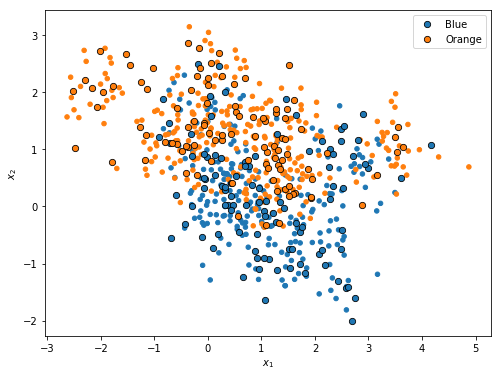

In [4]:
X_train, X_test, y_train, y_test = mixed_2d_2cls()
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, X_test, y_test)
plt.show()

## RBF采样

In [19]:
from pylib.utils.functions_for_classification import plot_decision_boundary
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn import set_config
set_config(display='diagram')

In [20]:
rfrbf_pipeline = Pipeline([("scaler", StandardScaler()),
                        ("rfrbf_feature", RBFSampler(random_state=42)),
                        ("sgd", SGDClassifier(random_state=42))])
rfrbf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfrbf_feature', RBFSampler(random_state=42)),
                ('sgd', SGDClassifier(random_state=42))])

In [21]:
train_err = 1 - rfrbf_pipeline.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.160


In [22]:
test_err = 1 - rfrbf_pipeline.score(X_test, y_test)
print("测试样本误差：{:.3f}".format(test_err))

测试样本误差：0.226


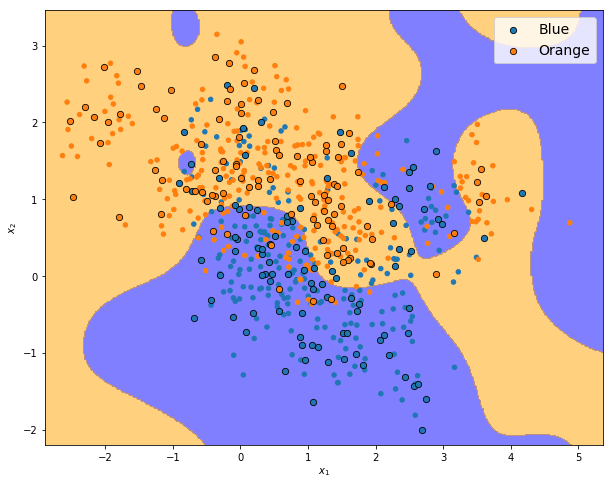

In [10]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, rfrbf_pipeline)
plt.show()

### 寻找最优参数

In [11]:
from sklearn.model_selection import GridSearchCV

In [23]:
components = np.arange(10, len(X_train) + 10, 10)
gammas = np.r_[np.logspace(-5, 2, 8), 1 / X_train.shape[1]].tolist()
gammas.sort()
alphas = np.logspace(-4, 3, 8)
param_grid = {
    "rfrbf_feature__n_components": components,
    "rfrbf_feature__gamma": gammas,
    "sgd__alpha": alphas}
rfrbf_cv = GridSearchCV(
    rfrbf_pipeline,
    param_grid,
    cv=10,
    n_jobs=-1
)
rfrbf_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfrbf_feature',
                                        RBFSampler(random_state=42)),
                                       ('sgd',
                                        SGDClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfrbf_feature__gamma': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 0.5, 1.0, 10.0, 100.0],
                         'rfrbf_feature__n_components': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200]),
                         'sgd__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [ ]:
rfrbf_cv.best_params_

### 使用最优模型

In [24]:
rfrbf_best = rfrbf_cv.best_estimator_

In [25]:
train_err = 1 - rfrbf_best.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.145


In [26]:
test_err = 1 - rfrbf_best.score(X_test, y_test)
print("测试样本误差：{:.3f}".format(test_err))

测试样本误差：0.242


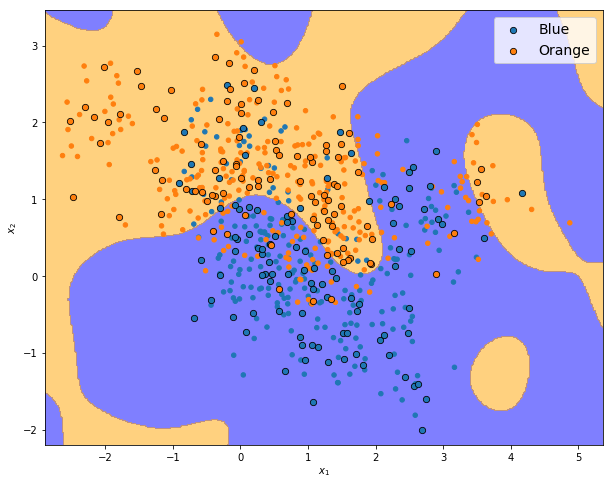

In [27]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, rfrbf_best)
plt.show()

### 绘制特征图

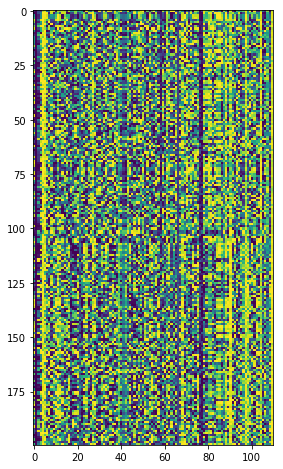

In [28]:
rfrbf_approx = rfrbf_best.named_steps["rfrbf_feature"]
feature_map = rfrbf_approx.fit_transform(X_train)

plt.figure(figsize=(6, 8))
plt.imshow(feature_map)
plt.show()